In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../../utils/load_notebook.py

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

ERROR:root:File `u'../../utils/load_notebook.py'` not found.


importing Jupyter notebook from utils.ipynb


In [5]:
def label_line(line, label, x, y, color='0.5', size=12):
    """Add a label to a line, at the proper angle.

    Arguments
    ---------
    line : matplotlib.lines.Line2D object,
    label : str
    x : float
        x-position to place center of text (in data coordinated
    y : float
        y-position to place center of text (in data coordinates)
    color : str
    size : float
    """
    xdata, ydata = line.get_data()
    x1 = xdata[0]
    x2 = xdata[-1]
    y1 = ydata[0]
    y2 = ydata[-1]

    ax = line.get_axes()
    text = ax.annotate(label, xy=(x, y), xytext=(-10, 0),
                       textcoords='offset points',
                       size=size, color=color,
                       horizontalalignment='left',
                       verticalalignment='bottom')

    sp1 = ax.transData.transform_point((x1, y1))
    sp2 = ax.transData.transform_point((x2, y2))

    rise = (sp2[1] - sp1[1])
    run = (sp2[0] - sp1[0])

    slope_degrees = np.degrees(np.arctan2(rise, run))
    text.set_rotation(slope_degrees)
    return text

In [6]:
dictionary = np.load('models//n1167_modelRmax.npy').tolist()

In [7]:
def plot_data_lim(ax, data_lim):
    '''Вертикальная линия, обозначающая конец данных'''
    ax.axvline(x=data_lim, ls='-.', color='black', alpha=0.5)
    
def plot_disc_scale(scale, ax, text=None):
    '''Обозначает масштаб диска'''
    ax.plot([scale, scale], [0., 0.05], '-', lw=6., color='black')
    if text:
        ax.annotate(text, xy=(scale, 0.025), xytext=(scale, 0.065), textcoords='data', arrowprops=dict(arrowstyle="->"))
        
def plot_Q_levels(ax, Qs, style='--', color='grey', alpha=0.4):
    '''Функция, чтобы рисовать горизонтальные линии различных уровней $Q^{-1}$:'''
    for Q in Qs:
        ax.axhline(y=1./Q, ls=style, color=color, alpha=alpha)
        
def plot_2f_vs_1f_(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None, **kwargs):
    '''Картинка сравнения 2F и 1F критерия для разных фотометрий и величин sig_R, 
    куда подается весь газ, результат НЕ исправляется за осесимметричные возмущения.'''
    
    Qgs = []
    Qss = []
    invQeff_min = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_max[ind], star_density=star_density_min[ind]))
        qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_max[ind], np.arange(0.01, 60000., 1.))
        invQeff_min.append(qeff[1])


    Qgs = []
    Qss = []
    invQeff_max = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_min[ind], star_density=star_density_max[ind]))
        qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_min[ind], np.arange(0.01, 60000., 1.))
        invQeff_max.append(qeff[1])
           
    rr = zip(*total_gas_data)[0]
    
    ax.fill_between(rr, invQeff_min, invQeff_max, color=color, alpha=alpha, label=label)
    ax.plot(rr, invQeff_min, 'd-', color=color, alpha=0.6)
    ax.plot(rr, invQeff_max, 'd-', color=color, alpha=0.6)
    ax.plot(rr, [1./_ for _ in Qgs], 'v-', color='b')

    ax.set_ylim(0., 1.5)
    ax.set_xlim(0., data_lim+50.)
    plot_data_lim(ax, data_lim)
    for h, annot in disk_scales:
        plot_disc_scale(h, ax, annot)
    plot_Q_levels(ax, [1., 1.5, 2., 3.])
    ax.legend()

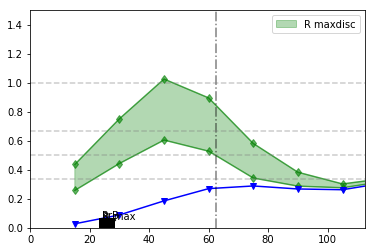

In [8]:
plot_2f_vs_1f_(ax=plt.gca(), **dictionary);

In [9]:
dictionary = np.load('models//n1167_modelRsubmax.npy').tolist()

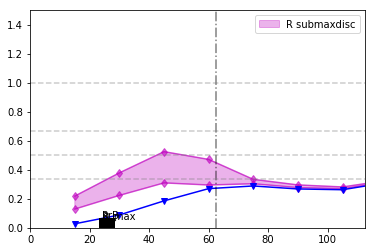

In [10]:
plot_2f_vs_1f_(ax=plt.gca(), **dictionary);

Считываем все модели

In [11]:
models = {}
for model in os.listdir('models/'):
    models[model[:-4]] = np.load('models//'+model).tolist()

In [12]:
models.keys()

['n5533_modelRzeroH2',
 'n4725_model36max',
 'n5533_modelr',
 'n1167_modelRsubmax',
 'n338_modelB',
 'n3898_modelRmax',
 'n4725_modelHmax',
 'n3898_modelR2dmax',
 'n2985_modelKmax',
 'n1167_modelRmax',
 'n5533_modelRmax',
 'n2985_model36max',
 'n338_modelR',
 'n4258_model36max',
 'n4258_modelImax']

Ставим классику:

In [13]:
import matplotlib as mpl
mpl.style.use('classic')

Меняем цвета на разные

In [14]:
for ind, model in enumerate(models.keys()):
    models[model]['color'] = cm.rainbow(np.linspace(0, 1, 15))[ind]
    
# swap for better look
models['n4258_model36max']['color'], models['n3898_modelRmax']['color'] = models['n3898_modelRmax']['color'], models['n4258_model36max']['color']

Вычисление $Q$:

In [15]:
def calc_Qs(total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None, sfrange=None, **kwargs):
    
    rr = zip(*total_gas_data)[0]

    Qgs = []
    Qss = []
    invQeff_min = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_max[ind], star_density=star_density_min[ind]))
        qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_max[ind], np.arange(0.01, 60000., 1.))
        invQeff_min.append(qeff[1])
        
    invQwff_WS_min = [1./Qg_ + 1./Qs_ for Qg_, Qs_ in zip(Qgs, Qss)]

    Qgs = []
    Qss_max = []
    invQeff_max = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss_max.append(Qs(epicycl=epicycl[ind], sigma=sigma_min[ind], star_density=star_density_max[ind]))
        qeff = findInvKinemQeffBrentq(Qss_max[-1], Qgs[-1], sound_vel/sigma_min[ind], np.arange(0.01, 60000., 1.))
        invQeff_max.append(qeff[1])
        
    invQwff_WS_max = [1./Qg_ + 1./Qs_ for Qg_, Qs_ in zip(Qgs, Qss_max)]
    
    return Qgs, Qss, Qss_max, invQeff_min, invQeff_max, invQwff_WS_min, invQwff_WS_max


for ind, key in enumerate(models.keys()):
    print key
    model = models[key]
    Qgs, Qss, Qss_max, invQeff_min, invQeff_max, invQeff_WS_min, invQeff_WS_max = calc_Qs(**model)
    model['Qgs'] = Qgs
    model['Qss_min'] = Qss
    model['Qss_max'] = Qss_max
    model['invQeff_min'] = invQeff_min
    model['invQeff_max'] = invQeff_max
    model['invQeff_WS_min'] = invQeff_WS_min
    model['invQeff_WS_max'] = invQeff_WS_max

n5533_modelRzeroH2
n4725_model36max
n5533_modelr
n1167_modelRsubmax
n338_modelB
n3898_modelRmax
n4725_modelHmax
n3898_modelR2dmax
n2985_modelKmax
n1167_modelRmax
n5533_modelRmax
n2985_model36max
n338_modelR
n4258_model36max
n4258_modelImax


Области звездообразования:

In [16]:
def plot_SF_338(ax):
    ax.plot([5., 60.], [0., 0.], '-', lw=7., color='red')
    
    
def plot_SF_1167(ax):
    ax.plot([16., 40.], [0., 0.], '-', lw=7., color='b') #GALEX
    ax.plot([55., 80.], [0., 0.], '-', lw=7., color='b') #GALEX
    ax.plot([22., 45.], [0., 0.], '-', lw=7., color='red') #Halpha
    
def plot_SF_2985(ax):
    ax.plot([10., 70.], [0., 0.], '-', lw=7., color='b')
    ax.plot([10., 7.2/(0.102*22.4/21.1)], [0., 0.], '-', lw=7., color='r') #TODO: исправить менее грубо
    
def plot_SF_3898(ax):
    ax.plot([70., 80.], [0., 0.], '-', lw=7., color='red')
    ax.plot([190., 210.], [0., 0.], '-', lw=7., color='red')
    ax.plot([0., 70.], [0., 0.], '-', lw=7., color='blue')
    ax.plot([40., 50.], [0., 0.], '-', lw=7., color='blue') #GALEX
    ax.plot([60., 75.], [0., 0.], '-', lw=7., color='blue') #GALEX
    
def plot_SF_4258(ax):
    ax.plot([0., 86./2/(175./600.)], [0., 0.], '-', lw=7., color='midnightblue')
    ax.plot([0., 150*58./180.], [0., 0.], '-', lw=7., color='r')
    ax.plot([250./2/(175./600.), 260./2/(175./600.)], [0., 0.], '-', lw=7., color='b') #внешняя спираль
    ax.plot([220./2/(175./600.), 310./2/(175./600.)], [0., 0.], '-', lw=7., color='b') #внешняя спираль, на глаз
    
def plot_SF_4725(ax):
    ax.plot([0., 300./238 * 161./4.], [0., 0.], '-', lw=7., color='red') #очень примерно, потому что в SDSS не видно, но оно там есть
    ax.plot([300./238 * 161./4., 300./238 *268./2.], [0., 0.], '--', lw=6., color='red', alpha=0.5) #в спитцере видно слабое
    ax.plot([300./238 * 161./2., 300./238 *268./2.], [0., 0.], '-', lw=7., color='red')
    ax.plot([290./238 *220., 300./238 *240], [0., 0.], '-', lw=7., color='b') #внешняя спираль, ширина условна
    
def plot_SF_5533(ax):
    ax.plot([10., 95.], [0., 0.], '-', lw=7., color='red')
    ax.plot([58.*(60/149.), 78.*(60/149.)], [0., 0.], '-', lw=7., color='b') #спирали оценил из картинки SDSS с масштабом
    ax.plot([126.*(60/149.), 155.*(60/149.)], [0., 0.], '-', lw=7., color='b')
    ax.plot([204.*(60/149.), 212.*(60/149.)], [0., 0.], '-', lw=7., color='b')
    ax.plot([240.*(60/149.), 250.*(60/149.)], [0., 0.], '-', lw=7., color='b')

SF = {'n338' : plot_SF_338, 'n1167' : plot_SF_1167, 'n2985' : plot_SF_2985, 'n3898' : plot_SF_3898, 'n4258': plot_SF_4258, 'n4725' : plot_SF_4725, 'n5533' : plot_SF_5533}

Полосы и имена:

In [17]:
for ind, name in enumerate(['n338', 'n1167', 'n2985', 'n3898', 'n4258', 'n4725', 'n5533']):
    for key in models.keys():
        if name in key:
            models[key]['name'] = 'NGC '+name[1:]
            models[key]['band'] = models[key]['label'].split(' ')[0]
            if name == 'n1167':
                if key == 'n1167_modelRsubmax':
                    models[key]['band'] = 'R^{sub}'
                else:
                    models[key]['band'] = 'R^{max}'
            if key == 'n5533_modelr':
                models[key]['band'] = 'r'
            if key == 'n3898_modelRmax':
                models[key]['band'] = 'R^{N}'
            if key == 'n3898_modelR2dmax':
                models[key]['band'] = 'R^{G}'
            if models[key]['band'] in ['S4G', 'SPITZER']:
                models[key]['band'] = '3.6\mu m'
            if key == 'n5533_modelRzeroH2':
                models[key]['band'] = 'R\,(H_2=0)'

# Qg vs Qs vs Qeff

C:\Anaconda\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


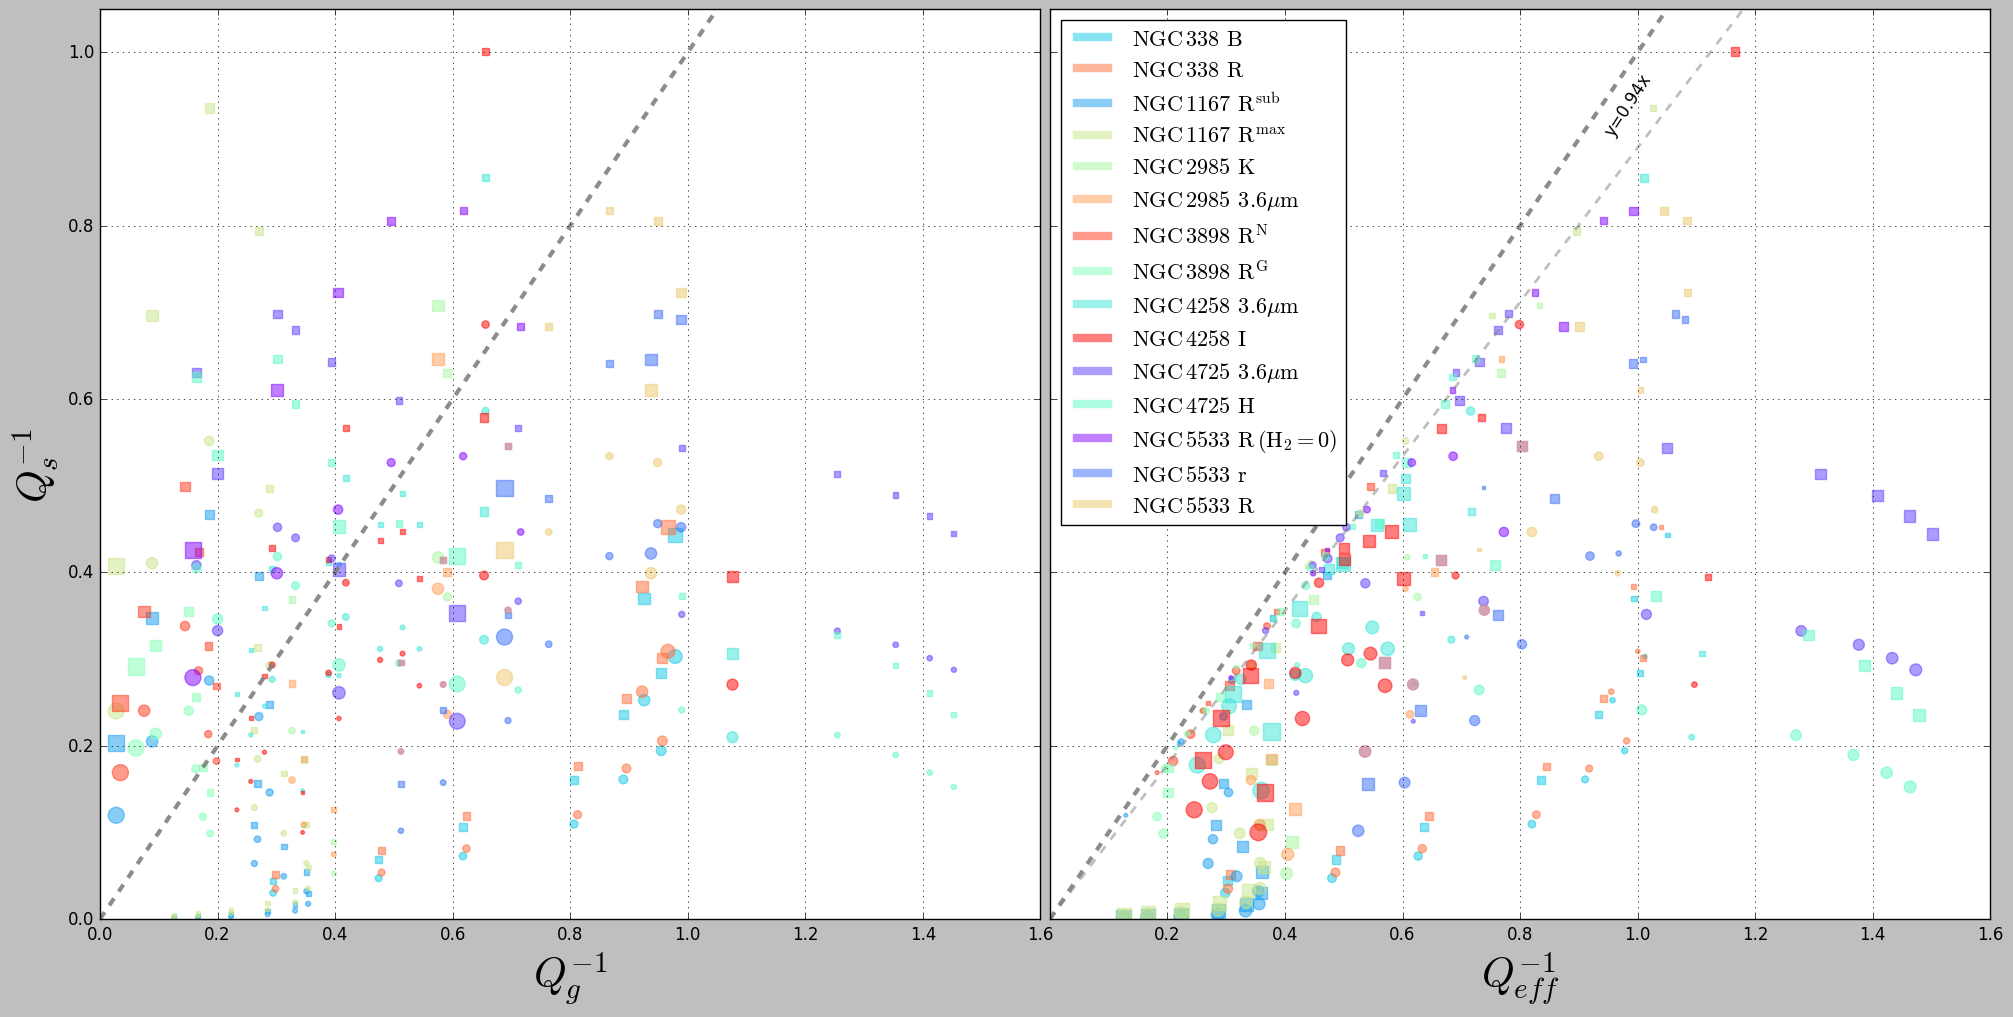

In [18]:
fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, figsize=[20, 10], sharey=True)

for ind, name in enumerate(['n338', 'n1167', 'n2985', 'n3898', 'n4258', 'n4725', 'n5533']):
    for key in models.keys():
        if name in key:
            color = models[key]['color']
            model = models[key]
            
            alpha_ = 0.5
            
            ax.scatter(map(lambda l: 1/l, model['Qgs']), map(lambda l: 1/l, model['Qss_min']), map(lambda l: 2000./l[0], model['total_gas_data']), marker='o', color=color, alpha=alpha_)
            ax.scatter(map(lambda l: 1/l, model['Qgs']), map(lambda l: 1/l, model['Qss_max']), map(lambda l: 2000./l[0], model['total_gas_data']), marker='s', color=color, alpha=alpha_)
            ax2.scatter(model['invQeff_min'], map(lambda l: 1/l, model['Qss_min']), map(lambda l: l[0]/2., model['total_gas_data']), marker='o', color=color, alpha=alpha_)
            ax2.scatter(model['invQeff_max'], map(lambda l: 1/l, model['Qss_max']), map(lambda l: l[0]/2., model['total_gas_data']), marker='s', color=color, alpha=alpha_)
            
#             model['Qgs'] = Qgs
#             model['Qss_min'] = Qss
#             model['Qss_max'] = Qss_max
#             model['invQeff_min'] = invQeff_min
#             model['invQeff_max'] = invQeff_max
#             model['invQwff_WS_min'] = invQwff_WS_min
#             model['invQwff_WS_max'] = invQwff_WS_max
            
            ax.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}\:\: ' + model['band'] + '$', lw=6, alpha=alpha_)
            ax2.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}\:\: ' + model['band'] + '$', lw=6, alpha=alpha_)
            
# ax.legend(loc='lower right')
ax.set_xlim(0, 1.6)
ax.set_ylim(0, 1.05)
ax.set_ylabel(r'$Q_{s}^{-1}$', fontsize=30)
ax.set_xlabel(r'$Q_{g}^{-1}$', fontsize=30)
ax.grid()

ax2.legend(loc='upper left', fontsize=16)
ax2.set_xlim(0, 1.6)
# ax2.set_ylim(0, 1.05)
ax2.set_xlabel(r'$Q_{eff}^{-1}$', fontsize=30)
# ax2.set_ylabel(r'$Q_{s}^{-1}$', fontsize=30)
ax2.grid()

# for _ in np.linspace(1., 2., 5):
       
#     line, = ax.plot([0., _*2], [0., 2.0], '--', alpha=0.3, color='gray')
#     label_line(line, 'y={:2.2f}x'.format(1./_), 0.8*_, 0.8, color='black')
    
#     line2, = ax.plot([0., 1.0], [0., _], '--', alpha=0.3, color='gray')
#     label_line(line2, 'y={:2.2f}x'.format(_), 0.8/_, 0.8, color='black')
# #     print np.arctan(1./_)*(180./np.pi)
# #     ax.text(0.8*_, 0.8, 'y={}x'.format(_), rotation=np.arctan(1./_)*(180./np.pi))

ax.plot([0., 2.0], [0., 2.0], '--', alpha=0.9, color='gray', lw=3)
ax2.plot([0., 2.0], [0., 2.0], '--', alpha=0.9, color='gray', lw=3)

line, = ax2.plot([0., 2/0.89], [0., 2.0], '--', alpha=0.5, color='gray', lw=2.)
label_line(line, 'y={:2.2f}x'.format(0.935), 0.9/0.935, 0.9, color='black')

plt.setp(ax2.get_xticklabels()[0], visible=False)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
fig.subplots_adjust(wspace=0.01, hspace=0.02)
plt.savefig(paper_imgs_dir+'Qs_vs_Qg_vs_Qeff.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'Qs_vs_Qg_vs_Qeff.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'Qs_vs_Qg_vs_Qeff.pdf', format='pdf', dpi=150, bbox_inches='tight')

plt.show()

# Qeff vs Q_WS vs Q_RF

Подготовка

In [19]:
for ind, key in enumerate(models.keys()):
    print key
    model = models[key]
    model['r_g_dens'] = zip(*model['total_gas_data'])[0]
    model['HI_gas_dens'] = [l[0][1]/He_coeff - l[1] for l in zip(model['total_gas_data'], model['CO'])]
    model['CO_gas_dens'] = model['CO']
    model['star_density'] = model['star_density_min']
    model['sigma_R_max'] = model['sigma_max']
    model['sigma_R_min'] = model['sigma_min']
    model['sound_vel_CO'] = model['sound_vel']
    model['sound_vel_HI'] = model['sound_vel']

n5533_modelRzeroH2
n4725_model36max
n5533_modelr
n1167_modelRsubmax
n338_modelB
n3898_modelRmax
n4725_modelHmax
n3898_modelR2dmax
n2985_modelKmax
n1167_modelRmax
n5533_modelRmax
n2985_model36max
n338_modelR
n4258_model36max
n4258_modelImax


In [20]:
%%time
from math import pi

def romeo_Qinv(r=None, epicycl=None, sound_vel_CO=11., sound_vel_HI=6., sigma_R=None, star_density=None, 
               HI_density=None, CO_density=None, alpha=None, scale=None, gas_approx=None, verbose=False, show=False, thin=True):
    G = 4.32
    kappa = epicycl
    Q_star = kappa*sigma_R/(pi*G*star_density)
    Q_CO = kappa*sound_vel_CO/(pi*G*CO_density)
    Q_HI = kappa*sound_vel_HI/(pi*G*HI_density)
    if not thin:
        T_CO, T_HI = 1.5, 1.5
        if alpha > 0 and alpha <= 0.5:
            T_star = 1. + 0.6*alpha**2
        else:
            T_star = 0.8 + 0.7*alpha
    else:
        T_CO, T_HI, T_star = 1., 1., 1.
    dispersions = [sigma_R, sound_vel_HI, sound_vel_CO]
    QTs = [Q_star*T_star, Q_HI*T_HI, Q_CO*T_CO]
    components = ['star', 'HI', 'H2']
    index = QTs.index(min(QTs))
    sig_m = dispersions[index]
    def W_i(sig_m, sig_i):
        return 2*sig_m*sig_i/(sig_m**2 + sig_i**2)
    return W_i(sig_m, dispersions[0])/QTs[0] + W_i(sig_m, dispersions[1])/QTs[1] + W_i(sig_m, dispersions[2])/QTs[2], components[index]

def calc_romeo_Q(r_g_dens=None, HI_gas_dens=None, CO_gas_dens=None, epicycl=None, sound_vel_CO=6., sound_vel_HI=11., sigma_R_max=None, sigma_R_min=None,  
           star_density=None, alpha_max=None, alpha_min=None, scale=None, gas_approx=None, thin=True, show=False, color=None, **kwargs):    
            
    totgas = zip(r_g_dens, [He_coeff*(l[0]+l[1]) for l in zip(HI_gas_dens, CO_gas_dens)])

    romeo_min = []
    for ind, (r, g, co) in enumerate(zip(r_g_dens, HI_gas_dens, CO_gas_dens)):
        rom, _ = romeo_Qinv(r=r, epicycl=epicycl[ind], sound_vel_CO=sound_vel_CO, sound_vel_HI=sound_vel_HI, sigma_R=sigma_R_max[ind], 
               star_density=star_density[ind], HI_density=He_coeff*g, CO_density=He_coeff*co, alpha=alpha_min, scale=scale, gas_approx=gas_approx[ind], thin=thin)
        romeo_min.append(rom)

    
    romeo_max = []
    for ind, (r, g, co) in enumerate(zip(r_g_dens, HI_gas_dens, CO_gas_dens)):
        rom, _ = romeo_Qinv(r=r, epicycl=epicycl[ind], sound_vel_CO=sound_vel_CO, sound_vel_HI=sound_vel_HI, sigma_R=sigma_R_min[ind], 
               star_density=star_density[ind], HI_density=He_coeff*g, CO_density=He_coeff*co, alpha=alpha_max, scale=scale, gas_approx=gas_approx[ind], thin=thin)
        romeo_max.append(rom)
    
    return romeo_min, romeo_max


for ind, key in enumerate(models.keys()):
    print key
    model = models[key]
    romeo_min, romeo_max = calc_romeo_Q(alpha_max=0.7, alpha_min=0.3, **model)
    model['romeo_min'] = romeo_min
    model['romeo_max'] = romeo_max

n5533_modelRzeroH2
n4725_model36max
n5533_modelr
n1167_modelRsubmax
n338_modelB
n3898_modelRmax
n4725_modelHmax
n3898_modelR2dmax
n2985_modelKmax
n1167_modelRmax
n5533_modelRmax
n2985_model36max
n338_modelR
n4258_model36max
n4258_modelImax
Wall time: 7 ms


n338_modelB
n338_modelR
n1167_modelRsubmax
n1167_modelRmax
n2985_modelKmax
n2985_model36max
n3898_modelRmax
n3898_modelR2dmax
n4258_model36max
n4258_modelImax
n4725_model36max
n4725_modelHmax
n5533_modelRzeroH2
n5533_modelr
n5533_modelRmax


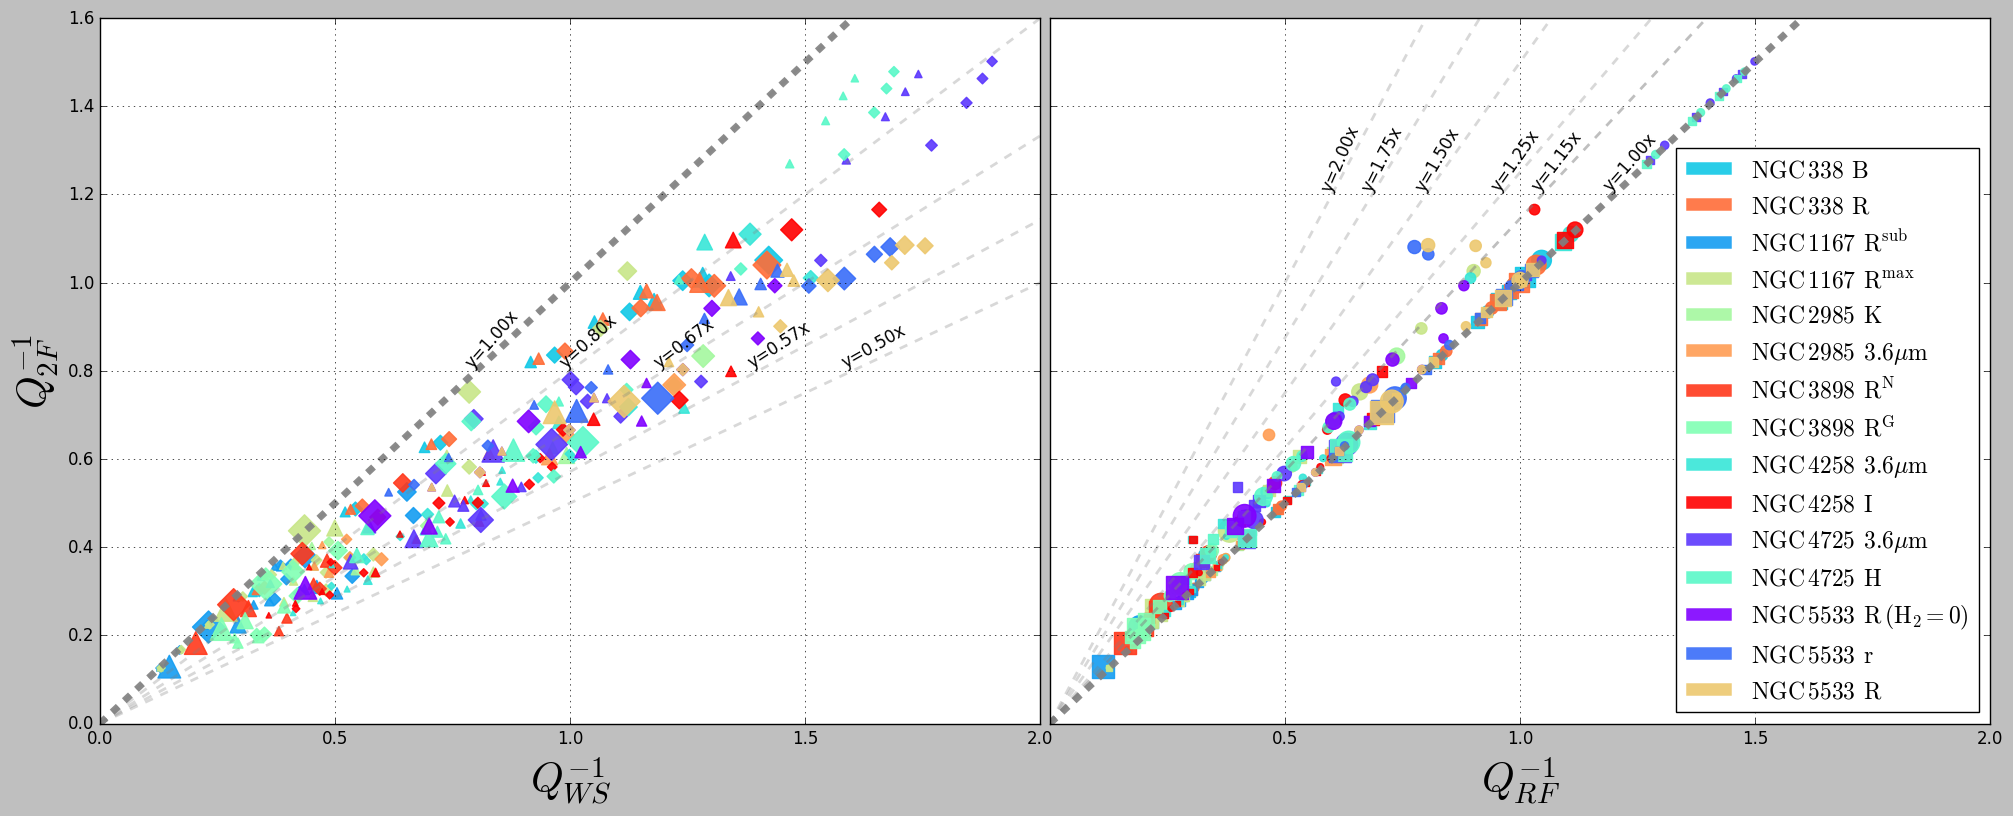

In [21]:
fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, figsize=[20, 8], sharey=True)

ax.plot([0., 2.0], [0., 2.0], '--', alpha=0.9, color='gray', lw=5)
ax2.plot([0., 2.0], [0., 2.0], '--', alpha=0.9, color='gray', lw=5)

for ind, name in enumerate(['n338', 'n1167', 'n2985', 'n3898', 'n4258', 'n4725', 'n5533']):
    for key in models.keys():
        if name in key:
            print key
            model = models[key]
            color = model['color']
            romeo_min = model['romeo_min']
            romeo_max = model['romeo_max']
            
            invQwff_WS_min = model['invQeff_WS_min']
            invQwff_WS_max = model['invQeff_WS_max']
            
            invQeff_min = model['invQeff_min']
            invQeff_max = model['invQeff_max']
            
            alpha_ = 0.9
            
            ax2.scatter(romeo_min, invQeff_min, map(lambda l: 4000./l[0], model['total_gas_data']), marker='s', color=color, alpha=alpha_)
            ax2.scatter(romeo_max, invQeff_max, map(lambda l: 4000./l[0], model['total_gas_data']), marker='o', color=color, alpha=alpha_)
            ax.scatter(invQwff_WS_min, invQeff_min, map(lambda l: 4000./l[0], model['total_gas_data']), marker='^', color=color, alpha=alpha_)
            ax.scatter(invQwff_WS_max, invQeff_max, map(lambda l: 4000./l[0], model['total_gas_data']), marker='D', color=color, alpha=alpha_)
            
            ax.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}\:\: ' + model['band'] + '$', lw=9, alpha=alpha_)
            ax2.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}\:\: ' + model['band'] + '$', lw=9, alpha=alpha_ )
            
# ax.legend(loc='lower right')
ax.set_xlim(0, 2.0)
ax.set_ylim(0, 1.6)
ax.set_ylabel(r'$Q_{2F}^{-1}$', fontsize=30)
ax.set_xlabel(r'$Q_{WS}^{-1}$', fontsize=30)
ax.grid()

ax2.legend(loc='lower right', fontsize=17)
ax2.set_xlim(0, 2.0)
ax2.set_ylim(0, 1.6)
# ax2.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=30)
ax2.set_xlabel(r'$Q_{RF}^{-1}$', fontsize=30)
ax2.grid()

for _ in np.linspace(1., 2., 5):
       
    line, = ax.plot([0., _*2], [0., 2.0], '--', alpha=0.3, color='gray', lw=2.)
    label_line(line, 'y={:2.2f}x'.format(1./_), 0.8*_, 0.8, color='black')
    
    line2, = ax2.plot([0., 2.0], [0., _*2], '--', alpha=0.3, color='gray', lw=2.)
    label_line(line2, 'y={:2.2f}x'.format(_), 1.2/_, 1.2, color='black')

line, = ax2.plot([0., 0.873*2], [0., 2.0], '--', alpha=0.5, color='gray', lw=2.)
label_line(line, 'y={:2.2f}x'.format(1./0.873), 1.2*0.873, 1.2, color='black')


plt.setp(ax2.get_xticklabels()[0], visible=False)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
fig.subplots_adjust(wspace=0.01, hspace=0.02)

plt.savefig(paper_imgs_dir+'Qeff_vs_QWS_vs_QRF.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'Qeff_vs_QWS_vs_QRF.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'Qeff_vs_QWS_vs_QRF.pdf', format='pdf', dpi=150, bbox_inches='tight')

plt.show()

Влияние толщины и разных дисперсий:

In [22]:
for ind, key in enumerate(models.keys()):
    model = models[key]
    romeo_min, romeo_max = calc_romeo_Q(alpha_max=0.7, alpha_min=0.3, thin=False, **model)
    model['romeo_min_h'] = romeo_min
    model['romeo_max_h'] = romeo_max

In [23]:
for ind, key in enumerate(models.keys()):
    model = models[key]
    model['sound_vel_CO'] = 6.
    model['sound_vel_HI'] = 11.
    romeo_min, romeo_max = calc_romeo_Q(alpha_max=0.7, alpha_min=0.3, thin=True, **model)
    model['romeo_min_11'] = romeo_min
    model['romeo_max_11'] = romeo_max

n338_modelB
n338_modelR
n1167_modelRsubmax
n1167_modelRmax
n2985_modelKmax
n2985_model36max
n3898_modelRmax
n3898_modelR2dmax
n4258_model36max
n4258_modelImax
n4725_model36max
n4725_modelHmax
n5533_modelRzeroH2
n5533_modelr
n5533_modelRmax


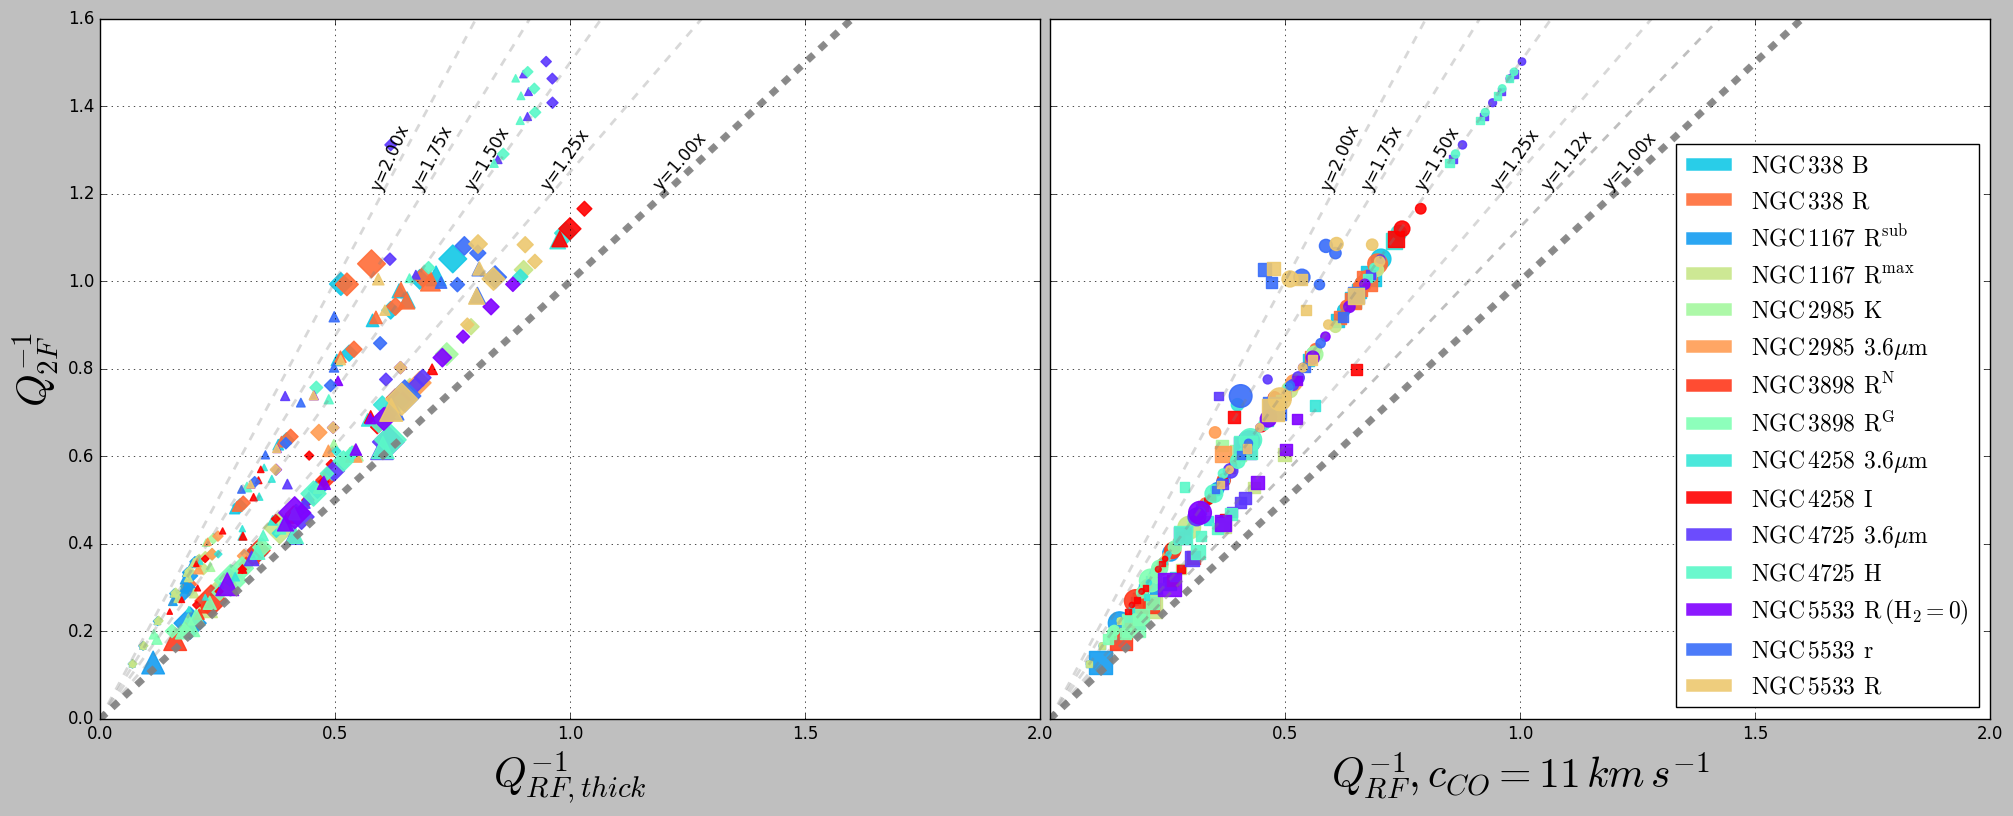

In [24]:
fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, figsize=[20, 8], sharey=True)

ax.plot([0., 2.0], [0., 2.0], '--', alpha=0.9, color='gray', lw=5)
ax2.plot([0., 2.0], [0., 2.0], '--', alpha=0.9, color='gray', lw=5)

for ind, name in enumerate(['n338', 'n1167', 'n2985', 'n3898', 'n4258', 'n4725', 'n5533']):
    for key in models.keys():
        if name in key:
            print key
            model = models[key]
            color = model['color']
            romeo_min_h = model['romeo_min_h']
            romeo_max_h = model['romeo_max_h']
            
            romeo_min_11 = model['romeo_min_11']
            romeo_max_11 = model['romeo_max_11']
            
            invQeff_min = model['invQeff_min']
            invQeff_max = model['invQeff_max']
            
            alpha_ = 0.9
            
            ax2.scatter(romeo_min_h, invQeff_min, map(lambda l: 4000./l[0], model['total_gas_data']), marker='s', color=color, alpha=alpha_)
            ax2.scatter(romeo_max_h, invQeff_max, map(lambda l: 4000./l[0], model['total_gas_data']), marker='o', color=color, alpha=alpha_)
            ax.scatter(romeo_min_11, invQeff_min, map(lambda l: 4000./l[0], model['total_gas_data']), marker='^', color=color, alpha=alpha_)
            ax.scatter(romeo_max_11, invQeff_max, map(lambda l: 4000./l[0], model['total_gas_data']), marker='D', color=color, alpha=alpha_)
            
            ax.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}\:\: ' + model['band'] + '$', lw=9, alpha=alpha_)
            ax2.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}\:\: ' + model['band'] + '$', lw=9, alpha=alpha_ )
            
# ax.legend(loc='lower right')
ax.set_xlim(0, 2.0)
ax.set_ylim(0, 1.6)
ax.set_ylabel(r'$Q_{2F}^{-1}$', fontsize=30)
ax.set_xlabel(r'$Q_{RF, thick}^{-1}$', fontsize=30)
ax.grid()

ax2.legend(loc='lower right', fontsize=17)
ax2.set_xlim(0, 2.0)
ax2.set_ylim(0, 1.6)
# ax2.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=30)
ax2.set_xlabel(r'$Q_{RF}^{-1},c_{CO}=11\,km\,s^{-1}$', fontsize=30)
ax2.grid()

for _ in np.linspace(1., 2., 5):
       
#     line, = ax.plot([0., _*2], [0., 2.0], '--', alpha=0.3, color='gray', lw=2.)
#     label_line(line, 'y={:2.2f}x'.format(1./_), 0.8*_, 0.8, color='black')
    
    line2, = ax2.plot([0., 2.0], [0., _*2], '--', alpha=0.3, color='gray', lw=2.)
    label_line(line2, 'y={:2.2f}x'.format(_), 1.2/_, 1.2, color='black')
    
    line1, = ax.plot([0., 2.0], [0., _*2], '--', alpha=0.3, color='gray', lw=2.)
    label_line(line1, 'y={:2.2f}x'.format(_), 1.2/_, 1.2, color='black')

line, = ax2.plot([0., 0.89*2], [0., 2.0], '--', alpha=0.5, color='gray', lw=2.)
label_line(line, 'y={:2.2f}x'.format(1./0.89), 1.2*0.89, 1.2, color='black')


plt.setp(ax2.get_xticklabels()[0], visible=False)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
fig.subplots_adjust(wspace=0.01, hspace=0.02)

plt.savefig(paper_imgs_dir+'Qeff_vs_QRFh_vs_QRF11.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'Qeff_vs_QRFh_vs_QRF11.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'Qeff_vs_QRFh_vs_QRF11.pdf', format='pdf', dpi=150, bbox_inches='tight')

plt.show()

# Главная картинка

Масштабы

In [25]:
models['n338_modelB']['disk_scales'] = 17.7
models['n338_modelR']['disk_scales'] = 18.3
models['n1167_modelRsubmax']['disk_scales'] = -10.
models['n1167_modelRmax']['disk_scales'] = 24.2
models['n2985_modelKmax']['disk_scales'] = 31.1
models['n2985_model36max']['disk_scales'] = [12.8, 48.9]
models['n3898_modelRmax']['disk_scales'] = 36.2
models['n3898_modelR2dmax']['disk_scales'] = [19.11, 59.9]
models['n4258_model36max']['disk_scales'] = 80.7
models['n4258_modelImax']['disk_scales'] = 74.2
models['n4725_model36max']['disk_scales'] = 73.2
models['n4725_modelHmax']['disk_scales'] = 50.28
models['n5533_modelRzeroH2']['disk_scales'] = -10.
models['n5533_modelr']['disk_scales'] = 28.0
models['n5533_modelRmax']['disk_scales'] = 34.4

plot n338_modelB
plot n338_modelR
plot n1167_modelRsubmax
plot n1167_modelRmax
plot n2985_modelKmax
plot n2985_model36max
plot n3898_modelRmax
plot n3898_modelR2dmax
plot n4258_model36max
plot n4258_modelImax
plot n4725_model36max
plot n4725_modelHmax
plot n5533_modelRzeroH2
plot n5533_modelr
plot n5533_modelRmax


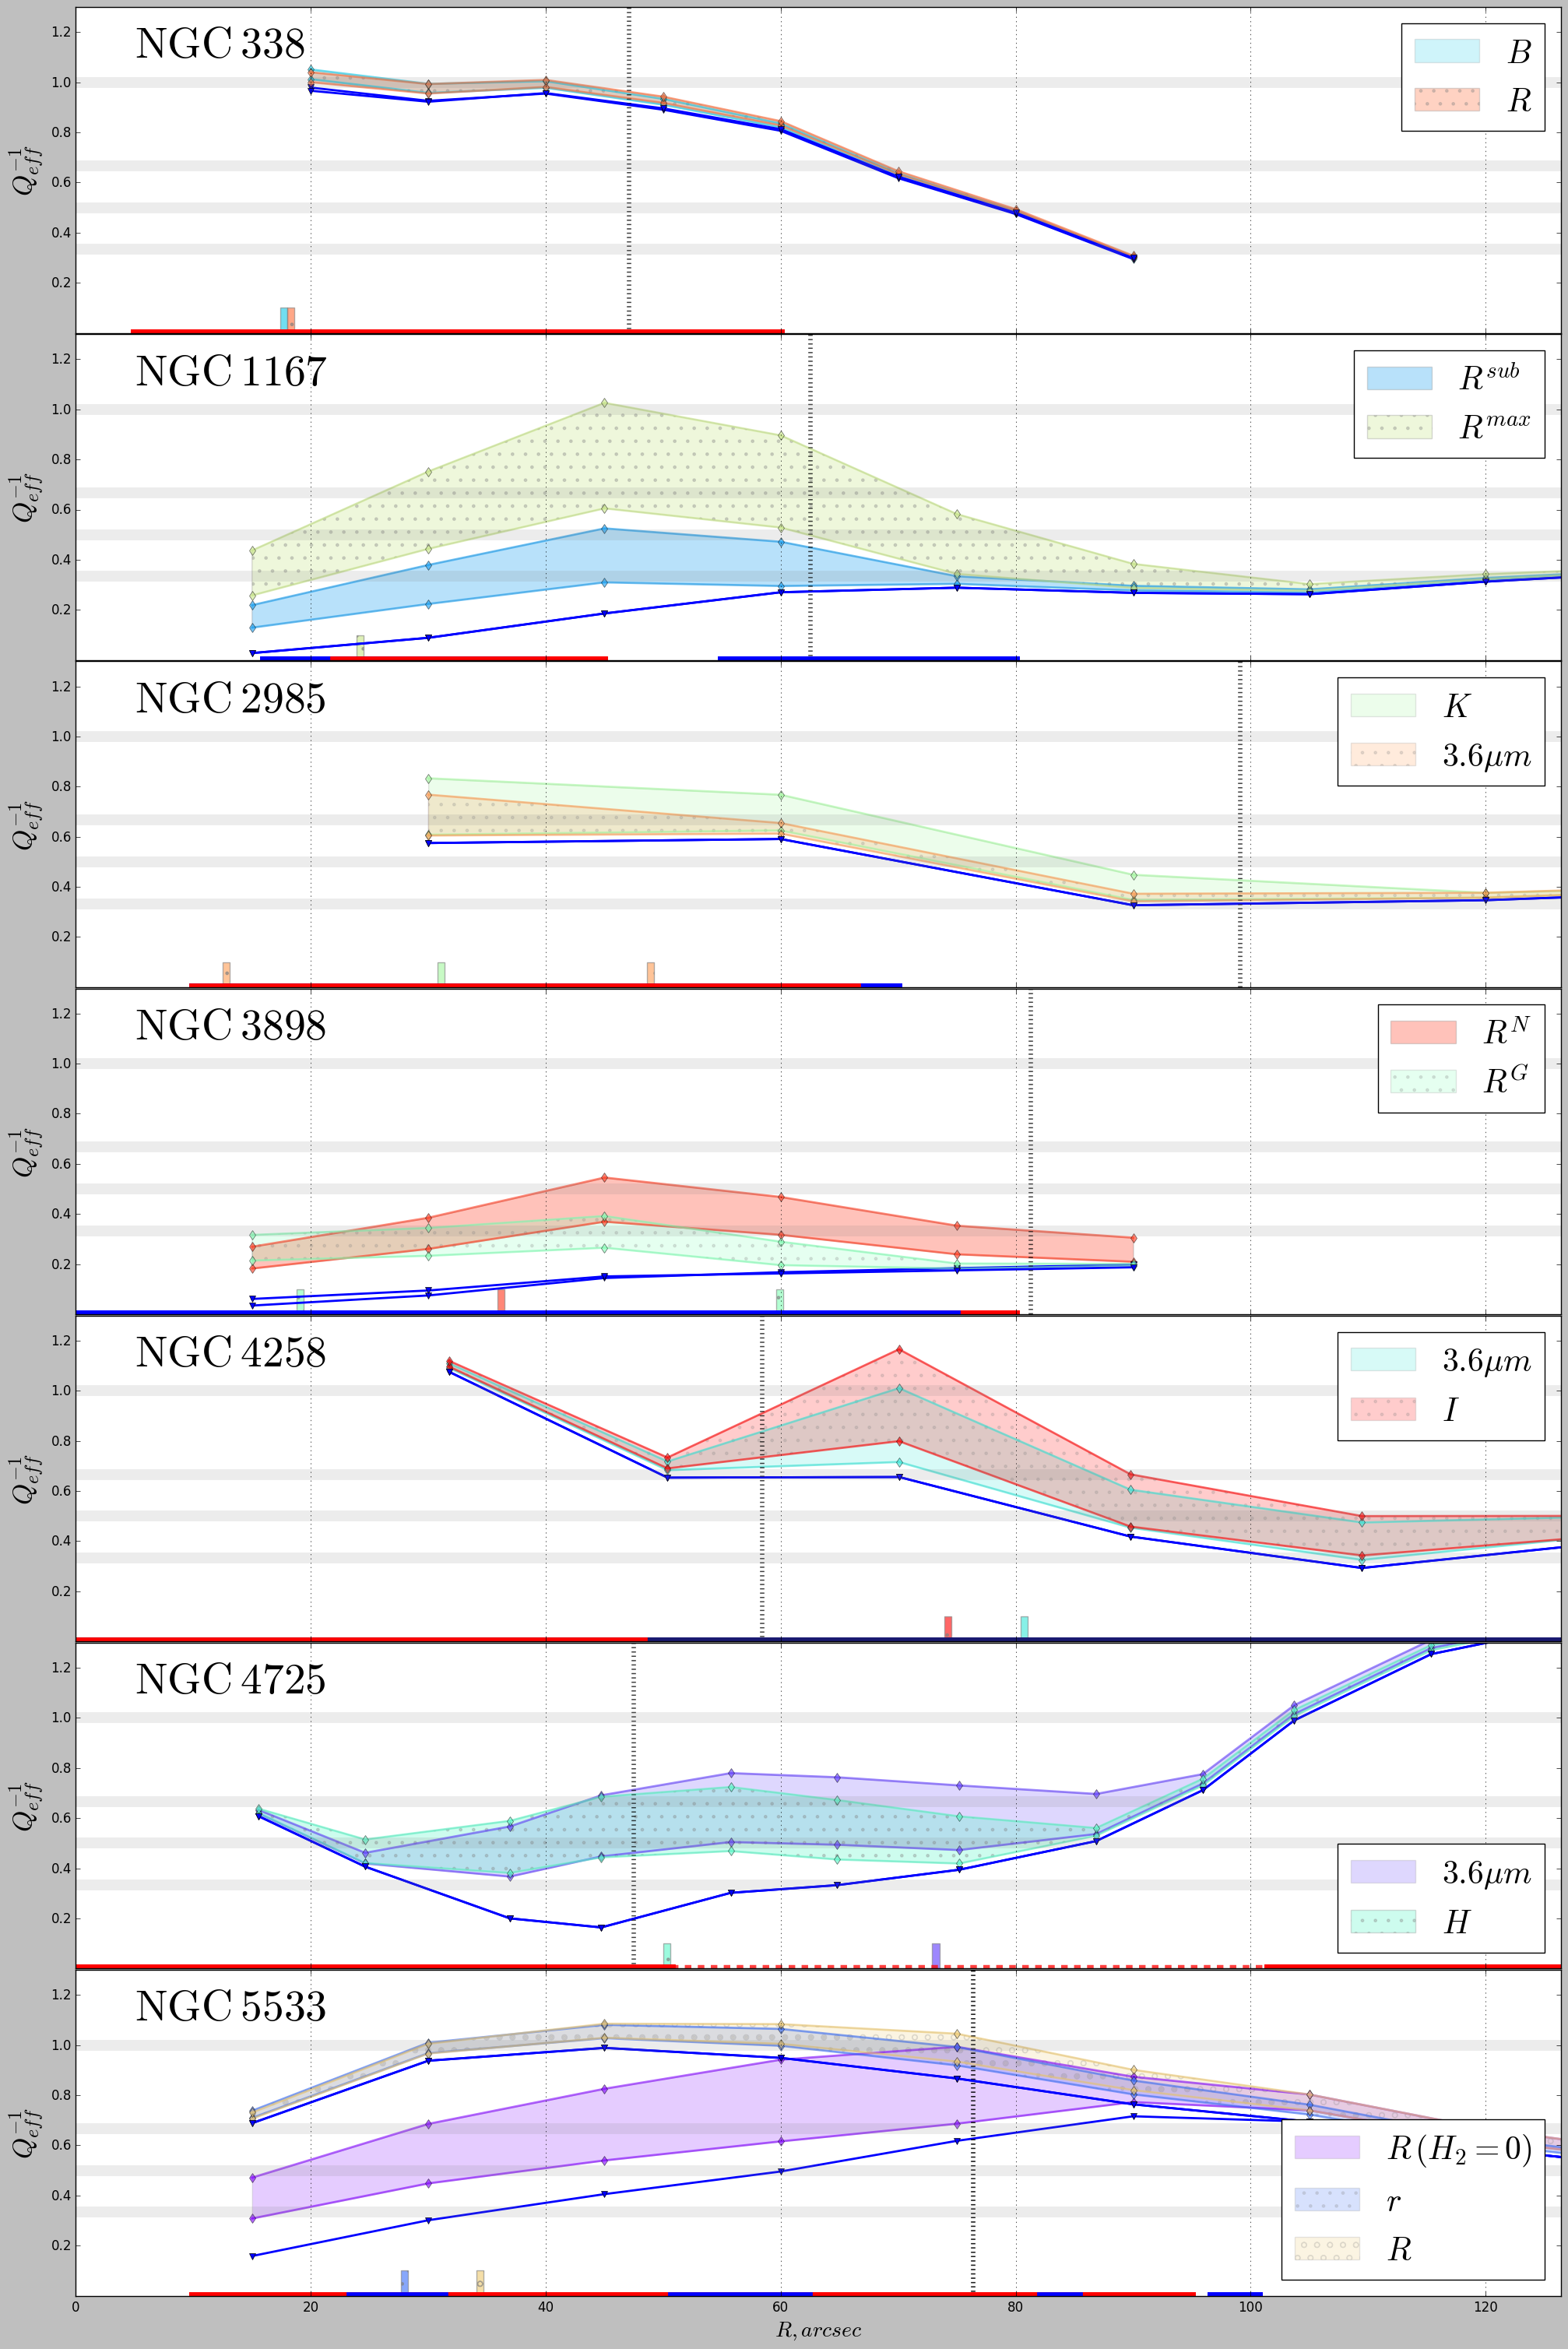

In [26]:
def plot_2f_vs_1f_(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, band=None,
                  star_density_min=None, data_lim=None, color=None, alpha=0.4, disk_scales=[], label=None, name=None, invQeff_min=None, 
                   invQeff_max = None, Qgs = None, hatch=None,**kwargs):    
    
    rr = zip(*total_gas_data)[0]
    
    invQg = [1/_ for _ in Qgs]
    
    ax.fill_between(rr, invQeff_min, invQeff_max, color=color, alpha=alpha, label=r'$' + band + '$', hatch=hatch, edgecolor='grey')
    ax.plot(rr, invQeff_min, 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, invQeff_max, 'd-', color=color, alpha=0.6, lw=2)
    ax.plot(rr, invQg, 'v-', color='b', lw=2)

    ax.set_ylim(0., 1.3)
    ax.set_xlim(0., data_lim+50.)
    ax.axvline(x=data_lim, ls=':', color='black', alpha=0.5, lw=4)
    if type(disk_scales) == list:
        for h in disk_scales:
            ax.fill_between([h-0.3, h+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    else:
        ax.fill_between([disk_scales-0.3, disk_scales+0.3], [0., 0.], [0.1, 0.1], color=color, alpha=0.6, hatch=hatch, edgecolor='grey')
    if name in ['NGC 5533', 'NGC 4725']:
        ax.legend(fontsize=30, loc='lower right')
    else:
        ax.legend(fontsize=30)
    ax.xaxis.grid(True)


fi, axes = plt.subplots(ncols=1, nrows=7, figsize=[20., 30.], sharex=True)
for ind, name in enumerate(['n338', 'n1167', 'n2985', 'n3898', 'n4258', 'n4725', 'n5533']):
    ax = axes[ind]
    count = 0
    hatch = None
    for key in models.keys():
        if name in key:
            model = models[key]
            if count > 0:
                hatch = [None, '.', 'o'][count]
            print 'plot {}'.format(key)
            plot_2f_vs_1f_(ax, hatch=hatch, **model)
            SF[name](ax)
            count+=1
    ax.text(5, 1.1, r'$\rm{NGC\:'+name[1:]+'}}$', fontsize=40)

    if ind == 6:
        ax.set_xlabel(r'$R, arcsec$', fontsize=20)
    ax.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=25)
    for q_ in [1., 1.5, 2., 3.]:
        ax.axhline(y=1./q_, lw=10, alpha=0.15, color='grey')
#     ax.set_yticks(['', '0.2', '0.4', '0.6', '0.8', '1.0', ''])
    plt.setp(ax.get_yticklabels()[0], visible=False)
    plt.setp(ax.get_yticklabels()[-1], visible=False)
    
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
fig.subplots_adjust(wspace=0.01, hspace=0.02)
    
plt.savefig(paper_imgs_dir+'allQeff.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'allQeff.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'allQeff.pdf', format='pdf', dpi=150, bbox_inches='tight')
    
plt.show();

# Зависимость от $c_g$

In [27]:
%%time
def calc_c_dependence(N=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vels=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None, sfrange=None, Qss_min=None, Qss_max=None,  **kwargs):
    
    rr = zip(*total_gas_data)[0]
    
    result = []
    for ind in range(N):
        c = sound_vels[ind]
        Qgs = []
        invQeff_min = []
        invQeff_max = []
        for ind, (r, gd) in enumerate(total_gas_data):
            Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=c, gas_density=gd))
            qeff = findInvKinemQeffBrentq(Qss_min[ind], Qgs[ind], c/sigma_max[ind], np.arange(0.01, 60000., 1.))
            invQeff_min.append(qeff[1])
            qeff = findInvKinemQeffBrentq(Qss_max[ind], Qgs[ind], c/sigma_min[ind], np.arange(0.01, 60000., 1.))
            invQeff_max.append(qeff[1])
        result.append((invQeff_min, invQeff_max))
        
    qmins = []
    qmaxs = []
    for ind, rrr in enumerate(rr):
        qmin = [result[l][0][ind] for l in range(len(result))]
        qmax = [result[l][1][ind] for l in range(len(result))]
        qmins.append((np.mean(qmin), np.std(qmin)))
        qmaxs.append((np.mean(qmax), np.std(qmax)))
    
    return qmins, qmaxs


for ind, key in enumerate(models.keys()):
    print key
    model = models[key]
    model['Qc_min'], model['Qc_max'] = calc_c_dependence(sound_vels=list(np.linspace(4., 20., 20)), N=20, **model)

n5533_modelRzeroH2
n4725_model36max
n5533_modelr
n1167_modelRsubmax
n338_modelB
n3898_modelRmax
n4725_modelHmax
n3898_modelR2dmax
n2985_modelKmax
n1167_modelRmax
n5533_modelRmax
n2985_model36max
n338_modelR
n4258_model36max
n4258_modelImax
Wall time: 1h 17min 10s


In [28]:
np.save('models_wth_c.npy', models)

plot n338_modelB
plot n338_modelR
plot n1167_modelRsubmax
plot n1167_modelRmax
plot n2985_modelKmax
plot n2985_model36max
plot n3898_modelRmax
plot n3898_modelR2dmax
plot n4258_model36max
plot n4258_modelImax
plot n4725_model36max
plot n4725_modelHmax
plot n5533_modelRzeroH2
plot n5533_modelr
plot n5533_modelRmax


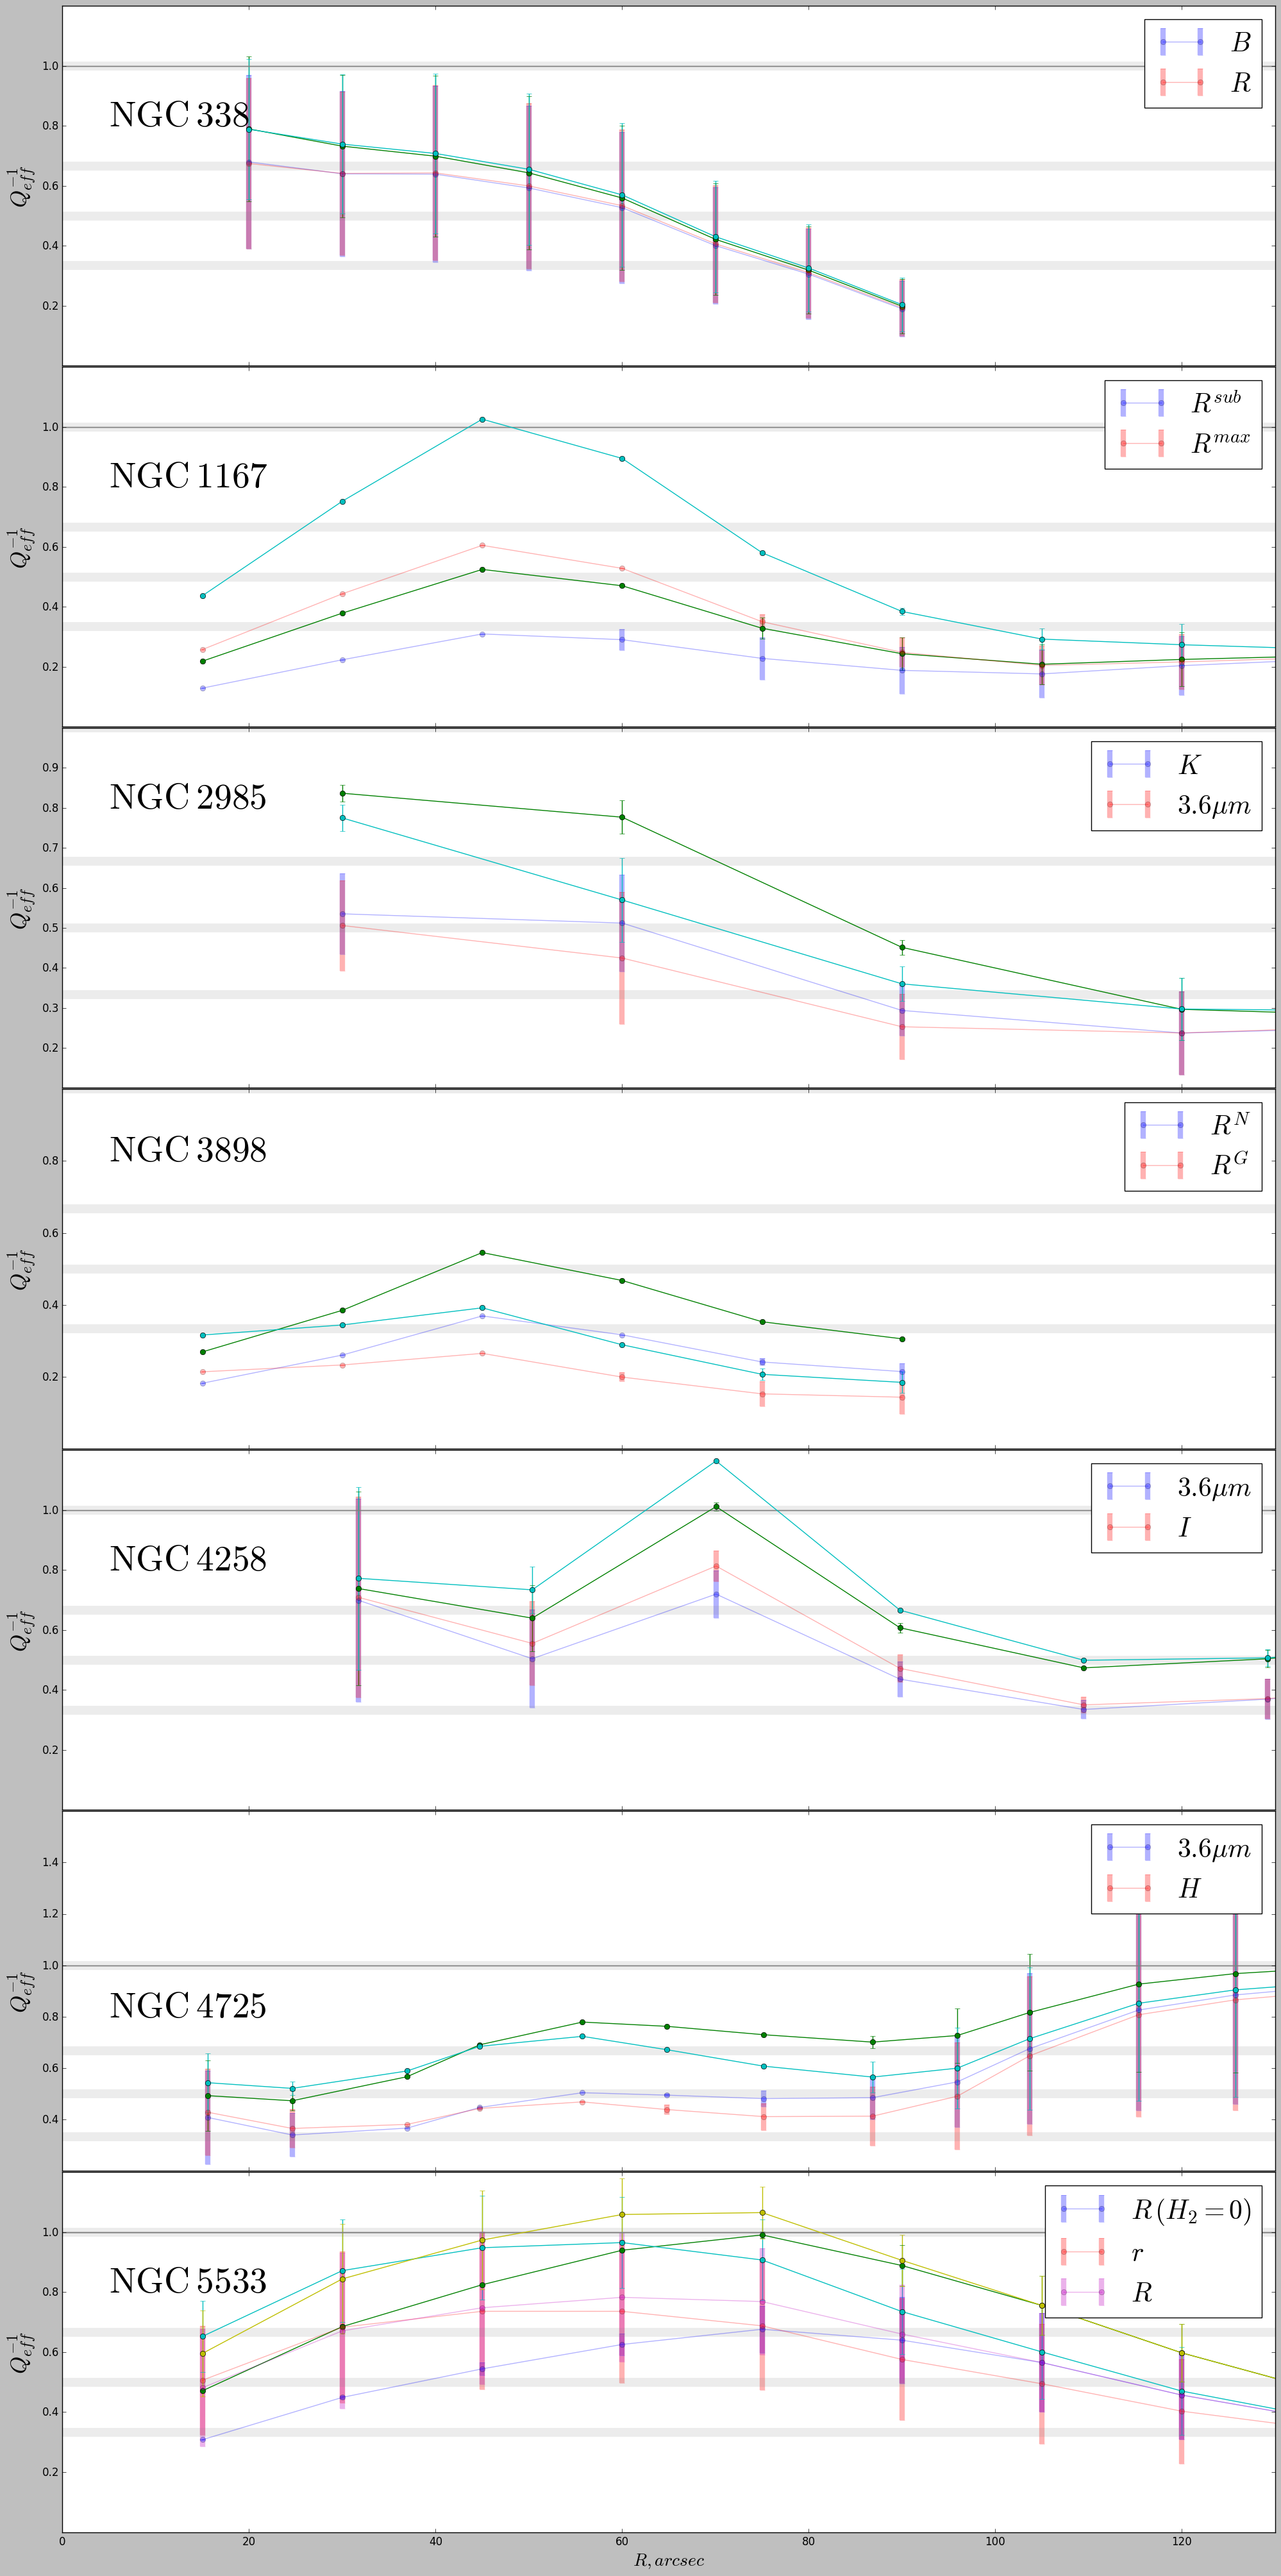

In [29]:
fi, axes = plt.subplots(ncols=1, nrows=7, figsize=[20., 40.], sharex=True)
for ind, name in enumerate(['n338', 'n1167', 'n2985', 'n3898', 'n4258', 'n4725', 'n5533']):
    ax = axes[ind]
    count = 0
    hatch = None
    for key in models.keys():
        if name in key:
            model = models[key]
            if count > 0:
                hatch = [None, '.', 'o'][count]
            print 'plot {}'.format(key)
            qmins, qmaxs = model['Qc_min'], model['Qc_max']
            rr = model['r_g_dens']
            ax.errorbar(rr, zip(*qmins)[0], fmt='o-', yerr=zip(*qmins)[1], elinewidth=6, alpha=0.3, label=r'$' + model['band'] + '$');
            ax.errorbar(rr, zip(*qmaxs)[0], fmt='o-', yerr=zip(*qmaxs)[1])
            ax.axhline(y=1., ls='-', color='grey')
#             SF[name](ax)
            count+=1
            ax.legend(fontsize=30)
    ax.text(5, 0.8, r'$\rm{NGC\:'+name[1:]+'}}$', fontsize=40)
    
    if ind == 6:
        ax.set_xlabel(r'$R, arcsec$', fontsize=20)
    ax.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=25)
    for q_ in [1., 1.5, 2., 3.]:
        ax.axhline(y=1./q_, lw=10, alpha=0.15, color='grey')
#     ax.set_yticks(['', '0.2', '0.4', '0.6', '0.8', '1.0', ''])
    plt.setp(ax.get_yticklabels()[0], visible=False)
    plt.setp(ax.get_yticklabels()[-1], visible=False)
    
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
fig.subplots_adjust(wspace=0.01, hspace=0.02)
    
# plt.savefig(paper_imgs_dir+'cg_depend.eps', format='eps', bbox_inches='tight')
# plt.savefig(paper_imgs_dir+'cg_depend.png', format='png', bbox_inches='tight')
# plt.savefig(paper_imgs_dir+'cg_depend.pdf', format='pdf', dpi=150, bbox_inches='tight')
ax.set_xlim(0, 130)
plt.show();

In [70]:
for ind, key in enumerate(models.keys()):
    print key
    model = models[key]
    model['r_g_dens'] = zip(*model['total_gas_data'])[0]
    model['HI_gas_dens'] = [l[0][1]/He_coeff - l[1] for l in zip(model['total_gas_data'], model['CO'])]
    model['CO_gas_dens'] = model['CO']
    model['star_density'] = model['star_density_min']
    model['sigma_R_max'] = model['sigma_max']
    model['sigma_R_min'] = model['sigma_min']
    model['sound_vel_CO'] = model['sound_vel']
    model['sound_vel_HI'] = model['sound_vel']

n5533_modelRzeroH2
n4725_model36max
n5533_modelr
n1167_modelRsubmax
n338_modelB
n3898_modelRmax
n4725_modelHmax
n3898_modelR2dmax
n2985_modelKmax
n1167_modelRmax
n5533_modelRmax
n2985_model36max
n338_modelR
n4258_model36max
n4258_modelImax


In [78]:
from math import pi

def romeo_Qinv(r=None, epicycl=None, sound_vel_CO=6., sound_vel_HI=6., sigma_R=None, star_density=None, 
               HI_density=None, CO_density=None, alpha=None, scale=None, gas_approx=None, verbose=False, show=False, thin=True):
    
    G = 4.32
    kappa = epicycl
    Q_star = kappa*sigma_R/(pi*G*star_density)
    Q_CO = kappa*sound_vel_CO/(pi*G*CO_density)
    Q_HI = kappa*sound_vel_HI/(pi*G*HI_density)
    if not thin:
        T_CO, T_HI = 1.5, 1.5
        if alpha > 0 and alpha <= 0.5:
            T_star = 1. + 0.6*alpha**2
        else:
            T_star = 0.8 + 0.7*alpha
    else:
        T_CO, T_HI, T_star = 1., 1., 1.
    dispersions = [sigma_R, sound_vel_HI, sound_vel_CO]
    QTs = [Q_star*T_star, Q_HI*T_HI, Q_CO*T_CO]
    components = ['star', 'HI', 'H2']
    index = QTs.index(min(QTs))
    sig_m = dispersions[index]
    def W_i(sig_m, sig_i):
        return 2*sig_m*sig_i/(sig_m**2 + sig_i**2)
    print index, components[index]
    print 'Ws/Qs={:5.3f} WHI/QHI={:5.3f} WCO/QCO={:5.3f}'.format(W_i(sig_m, dispersions[0])/QTs[0], W_i(sig_m, dispersions[1])/QTs[1], W_i(sig_m, dispersions[2])/QTs[2])
    print 'Ws={:5.3f} WHI={:5.3f} WCO={:5.3f}'.format(W_i(sig_m, dispersions[0]), W_i(sig_m, dispersions[1]), W_i(sig_m, dispersions[2]))
    
    Qg_ = Qg(epicycl=epicycl, sound_vel=sound_vel_CO, gas_density=(CO_density + HI_density))
    Qs_ = Qs(epicycl=epicycl, sigma=sigma_R, star_density=star_density)
    qeff = findInvKinemQeffBrentq(Qs_, Qg_, sound_vel_CO/sigma_R, np.arange(0.01, 60000., 1.))
    print 'Qg = {:5.3f} Qs={:5.3f} Qeff={:5.3f} Qfee/QR = {:5.3f} {:5.3f}'.format(1./Qg_, 1./Qs_, qeff[1], (qeff[1]/(W_i(sig_m, dispersions[0])/QTs[0] + 
                                                                                                             W_i(sig_m, dispersions[1])/QTs[1] + W_i(sig_m, dispersions[2])/QTs[2])),
                                                                                 (Qs_/Q_star))
    
    return W_i(sig_m, dispersions[0])/QTs[0] + W_i(sig_m, dispersions[1])/QTs[1] + W_i(sig_m, dispersions[2])/QTs[2], components[index]

def calc_romeo_Q(r_g_dens=None, HI_gas_dens=None, CO_gas_dens=None, epicycl=None, sound_vel_CO=6., sound_vel_HI=11., sigma_R_max=None, sigma_R_min=None,  
           star_density=None, alpha_max=None, alpha_min=None, scale=None, gas_approx=None, thin=True, show=False, color=None, **kwargs):    
            
    totgas = zip(r_g_dens, [He_coeff*(l[0]+l[1]) for l in zip(HI_gas_dens, CO_gas_dens)])

    romeo_min = []
    components_min = []
    for ind, (r, g, co) in enumerate(zip(r_g_dens, HI_gas_dens, CO_gas_dens)):
        rom, _ = romeo_Qinv(r=r, epicycl=epicycl[ind], sound_vel_CO=sound_vel_CO, sound_vel_HI=sound_vel_HI, sigma_R=sigma_R_max[ind], 
               star_density=star_density[ind], HI_density=He_coeff*g, CO_density=He_coeff*co, alpha=alpha_min, scale=scale, gas_approx=gas_approx[ind], thin=thin)
        romeo_min.append(rom)
        components_min.append(_)

    
    romeo_max = []
    components_max = []
    for ind, (r, g, co) in enumerate(zip(r_g_dens, HI_gas_dens, CO_gas_dens)):
        rom, _ = romeo_Qinv(r=r, epicycl=epicycl[ind], sound_vel_CO=sound_vel_CO, sound_vel_HI=sound_vel_HI, sigma_R=sigma_R_min[ind], 
               star_density=star_density[ind], HI_density=He_coeff*g, CO_density=He_coeff*co, alpha=alpha_max, scale=scale, gas_approx=gas_approx[ind], thin=thin)
        romeo_max.append(rom)
        components_max.append(_)
    
    return romeo_min, romeo_max, components_min, components_max


for ind, key in enumerate(models.keys()):
    print key
    model = models[key]
    romeo_min, romeo_max, components_min, components_max = calc_romeo_Q(alpha_max=0.7, alpha_min=0.3, thin=True, **model)
    model['romeo_min'] = romeo_min
    model['romeo_max'] = romeo_max
    model['components_min'] = components_min
    model['components_max'] = components_max

n5533_modelRzeroH2
0 star
Ws/Qs=0.261 WHI/QHI=0.010 WCO/QCO=0.000
Ws=1.000 WHI=0.064 WCO=0.064
Qg = 0.158 Qs=0.279 Qeff=0.308 Qfee/QR = 1.137 0.935
0 star
Ws/Qs=0.373 WHI/QHI=0.021 WCO/QCO=0.000
Ws=1.000 WHI=0.071 WCO=0.071
Qg = 0.301 Qs=0.399 Qeff=0.448 Qfee/QR = 1.135 0.935
0 star
Ws/Qs=0.442 WHI/QHI=0.034 WCO/QCO=0.000
Ws=1.000 WHI=0.085 WCO=0.085
Qg = 0.405 Qs=0.472 Qeff=0.540 Qfee/QR = 1.133 0.935
1 HI
Ws/Qs=0.052 WHI/QHI=0.494 WCO/QCO=0.001
Ws=0.105 WHI=1.000 WCO=1.000
Qg = 0.495 Qs=0.527 Qeff=0.616 Qfee/QR = 1.125 0.935
1 HI
Ws/Qs=0.062 WHI/QHI=0.616 WCO/QCO=0.002
Ws=0.124 WHI=1.000 WCO=1.000
Qg = 0.618 Qs=0.534 Qeff=0.686 Qfee/QR = 1.010 0.935
1 HI
Ws/Qs=0.052 WHI/QHI=0.714 WCO/QCO=0.002
Ws=0.125 WHI=1.000 WCO=1.000
Qg = 0.716 Qs=0.447 Qeff=0.772 Qfee/QR = 1.006 0.935
1 HI
Ws/Qs=0.042 WHI/QHI=0.691 WCO/QCO=0.003
Ws=0.125 WHI=1.000 WCO=1.000
Qg = 0.694 Qs=0.356 Qeff=0.739 Qfee/QR = 1.005 0.935
1 HI
Ws/Qs=0.032 WHI/QHI=0.581 WCO/QCO=0.003
Ws=0.125 WHI=1.000 WCO=1.000
Qg = 0.584 Q

KeyboardInterrupt: 

n338_modelB
n338_modelR
n1167_modelRsubmax
n1167_modelRmax
n2985_modelKmax
n2985_model36max
n3898_modelRmax
n3898_modelR2dmax
n4258_model36max
n4258_modelImax
n4725_model36max
n4725_modelHmax
n5533_modelRzeroH2
n5533_modelr
n5533_modelRmax


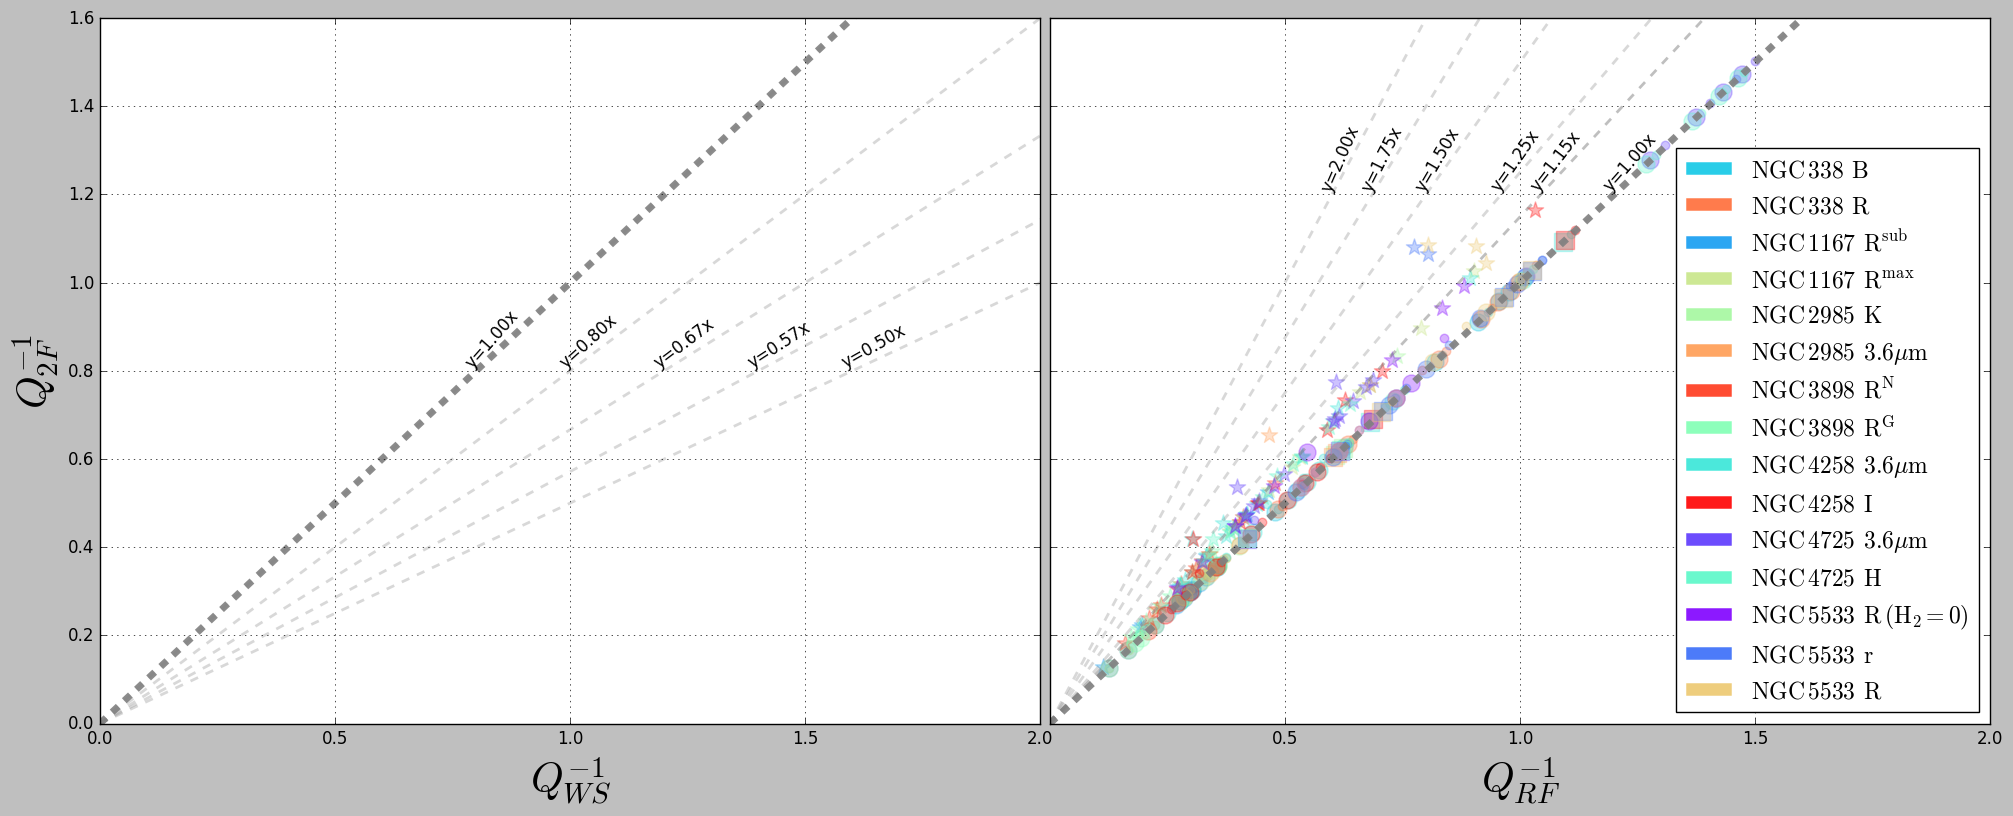

In [79]:
fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, figsize=[20, 8], sharey=True)

ax.plot([0., 2.0], [0., 2.0], '--', alpha=0.9, color='gray', lw=5)
ax2.plot([0., 2.0], [0., 2.0], '--', alpha=0.9, color='gray', lw=5)

for ind, name in enumerate(['n338', 'n1167', 'n2985', 'n3898', 'n4258', 'n4725', 'n5533']):
    for key in models.keys():
        if name in key:
            print key
            model = models[key]
            color = model['color']
            romeo_min = model['romeo_min']
            romeo_max = model['romeo_max']
            
            invQwff_WS_min = model['invQeff_WS_min']
            invQwff_WS_max = model['invQeff_WS_max']
            
            invQeff_min = model['invQeff_min']
            invQeff_max = model['invQeff_max']
            
            components_min = model['components_min']
            components_max = model['components_max']
            
            alpha_ = 0.9
            for ind_ in range(len(romeo_min)):
                marker = '*' if components_min[ind_] == 'star' else '.'
                ax2.scatter(romeo_min[ind_], invQeff_min[ind_], 150., marker=marker, color=color, alpha=0.3)
                marker = '*' if components_max[ind_] == 'star' else '.'
                ax2.scatter(romeo_max[ind_], invQeff_max[ind_], 150., marker=marker, color=color, alpha=0.3)
#             ax.scatter(invQwff_WS_min, invQeff_min, map(lambda l: 4000./l[0], model['total_gas_data']), marker='^', color=color, alpha=alpha_)
#             ax.scatter(invQwff_WS_max, invQeff_max, map(lambda l: 4000./l[0], model['total_gas_data']), marker='D', color=color, alpha=alpha_)
            
            ax.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}\:\: ' + model['band'] + '$', lw=9, alpha=alpha_)
            ax2.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}\:\: ' + model['band'] + '$', lw=9, alpha=alpha_ )
            
# ax.legend(loc='lower right')
ax.set_xlim(0, 2.0)
ax.set_ylim(0, 1.6)
ax.set_ylabel(r'$Q_{2F}^{-1}$', fontsize=30)
ax.set_xlabel(r'$Q_{WS}^{-1}$', fontsize=30)
ax.grid()

ax2.legend(loc='lower right', fontsize=17)
ax2.set_xlim(0, 2.0)
ax2.set_ylim(0, 1.6)
# ax2.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=30)
ax2.set_xlabel(r'$Q_{RF}^{-1}$', fontsize=30)
ax2.grid()

for _ in np.linspace(1., 2., 5):
       
    line, = ax.plot([0., _*2], [0., 2.0], '--', alpha=0.3, color='gray', lw=2.)
    label_line(line, 'y={:2.2f}x'.format(1./_), 0.8*_, 0.8, color='black')
    
    line2, = ax2.plot([0., 2.0], [0., _*2], '--', alpha=0.3, color='gray', lw=2.)
    label_line(line2, 'y={:2.2f}x'.format(_), 1.2/_, 1.2, color='black')

line, = ax2.plot([0., 0.87*2], [0., 2.0], '--', alpha=0.5, color='gray', lw=2.)
label_line(line, 'y={:2.2f}x'.format(1./0.87), 1.2*0.87, 1.2, color='black')


plt.setp(ax2.get_xticklabels()[0], visible=False)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
fig.subplots_adjust(wspace=0.01, hspace=0.02)

plt.show()